<h1><center>Data Analysis</center></h1>
<h2><center>Kaggle report notebook</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Introduce yourself

Put your team name and team-members' names below

**Team:**

ml gods

**Members:**  
- Nikita Zaytsev
- Alexey Buzulukov
- Makar Lysenko

# Task

In this task we are working with posts on famous russian advertisement and resell platform.

Ginen information about the post and corresponding item you have to estimate its probability to be sold in 3 days.

Below you will find some desirable stages of your report.

# Data Loading

In [2]:
data = pd.read_csv('train.tsv', sep='\t')
data.drop(columns='Unnamed: 0', inplace=True)
data.head()

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast
0,4,Краснодар,2018-10-08,False,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,True,500.0,8cb80c05c65c210275f5500779d6b593,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1
1,4,Тюмень,2018-06-18,False,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,False,300.0,3b7a9f8b27a53b63525f95bc8070abb2,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0
2,9,Омск,2018-07-31,True,"Новый,с этикеткой. Размер L. Не подошёл по раз...",1,54.9889,73.4312,Костюм,51b408796027214232532b7e478e2159,True,1100.0,c97dd9c5a3e938c52cf5d7822bc0eb7b,1,[{'slug_id': 'zhenskaya_odezhda_pidzhaki_kosty...,Омская область,1,908,0
3,3,Санкт-Петербург,2018-04-17,False,"Складывается тростью, все колеса вниз. Сплошна...",4,59.9590,30.4877,Коляска,6544b83acbbf04439a7ba983093cafb4,True,5000.0,3e5d0286b25fd7f62f88bc436a59ae4e,1,"[{'slug_id': 'waggon_type', 'slug_name': 'Тип'...",Ленинградская область,1,312,0
4,5,Москва,2018-02-09,False,"Неразлучники, птичкам по 1,5 года. Продаю с бо...",2,55.6473,37.4118,Волнистые попугаи,ea575e28daf1f47bfce63015cd3ce5cf,True,2000.0,57b4a8679d0d3eb1e31367b57221098f,1,[],Московская область,1,504,0


In [3]:
data_submit = pd.read_csv('test_nolabel.tsv', sep='\t')
data_submit.drop(columns='Unnamed: 0', inplace=True)
data_submit.head()

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id
0,9,Челябинск,2018-10-22,True,"Ботильоны канадские 34 размер (35,но маломерят...",3,55.2639,61.3972,Ботильоны,4ec4746e62084fba6280d6651099f316,True,650.0,86156cd607c3238af8982aebc99ae6a5,1,"[{'slug_id': 'sostojanie_garderob', 'slug_name...",Челябинская область,1,902
1,22,Барнаул,2018-11-09,True,"Зимний костюм. Куртка в отличном состоянии, на...",2,53.3426,83.7380,Зимний костюм,180b02e19c8c0140bcd9e719fee0eb2d,True,750.0,76a35a1b4a2d869abfda3365d7cd4c45,1,"[{'slug_id': 'detskie_pol', 'slug_name': 'Пол'...",Алтайский край,1,2204
2,12,Чита,2018-11-27,False,"Продам прекрасный, стильный и шустрый смартфон...",4,52.0883,113.4982,"5.5"" Смартфон Prestigio Grace R5 LTE 16 гб зол...",b9b9b1e11e85acfd5c26e0e51bc734be,True,5500.0,c339765b077a730a5367c5310c64128d,1,"[{'slug_id': 'smartfony_3g', 'slug_name': '3G'...",Забайкальский край,1,1202
3,3,Москва,2018-11-25,True,Горка для купания на присосках. После одного м...,2,55.6932,37.5684,Горка для купания,88c125a4cfa8b806b8ce647b2e2f57da,True,100.0,b3ec786129b0b3bd7dcbce29d6d6232d,1,[],Московская область,1,316
4,22,Бердск,2018-11-04,True,Новый! В наличии! Размер 90 см Доставка по Бер...,2,54.7648,83.0884,Новый костюм,d82287641ee83c962ee0b427031f35d0,True,700.0,751a58cadb565feb070c2a29dd401438,1,"[{'slug_id': 'detskie_tzvet', 'slug_name': 'Цв...",Новосибирская область,1,2214


# Descriptive Data Analysis

* Analyze train dataset features
    * Provide some meaningfull description about corresponding features (in form of pictures or some coefficients)
    * Outline any findings you are able to reveal
* Try to measure analyse any correspondense between features and target features

In [4]:
def histogram(feature, target):
    plt.figure()
    plt.hist(feature[target == 0], bins=100, color='red', alpha=0.5)
    plt.hist(feature[target == 1], bins=100, color='blue', alpha=0.5)
    plt.xlabel('feature')
    plt.ylabel('sold_fast')
    plt.legend([0, 1])
    plt.show()

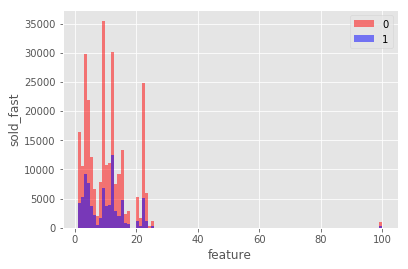

In [5]:
histogram(data['category_id'].values, data['sold_fast'].values)

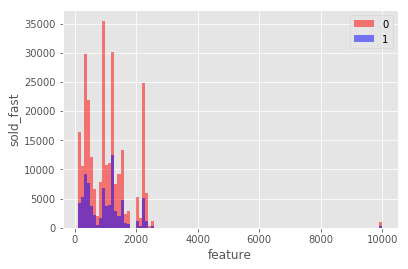

In [6]:
histogram(data['subcategory_id'].values, data['sold_fast'].values)

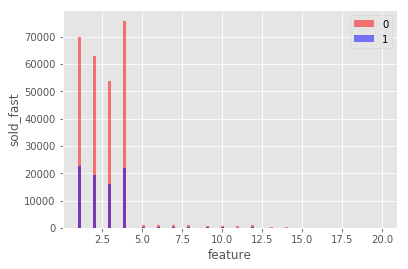

In [7]:
histogram(data['img_num'].values, data['sold_fast'].values)

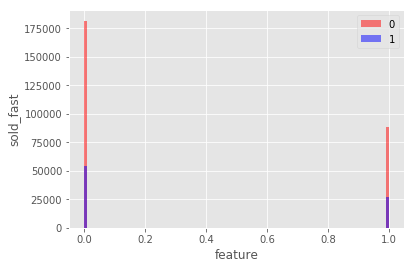

In [8]:
histogram(data['delivery_available'].values.astype(int), data['sold_fast'].values)

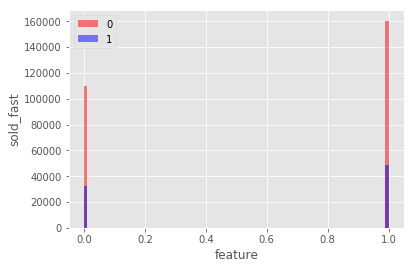

In [9]:
histogram(data['payment_available'].values.astype(int), data['sold_fast'].values)

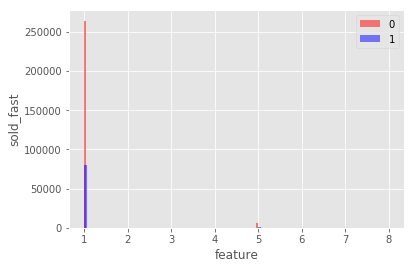

In [10]:
histogram(data['product_type'].values, data['sold_fast'].values)

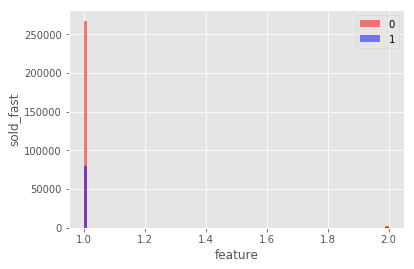

In [11]:
histogram(data['sold_mode'].values, data['sold_fast'].values)

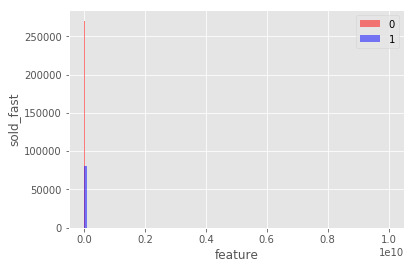

In [12]:
histogram(data['price'].values, data['sold_fast'].values)

The correspondence between the features and the target variable can't be easily seen.

# Feature engineering

**The year**

In [13]:
def create_year(date_created):
    n = len(date_created)
    
    year = np.empty(n, dtype=int)
    
    for i in range(n):
        year[i] = int(date_created[i][0:4])
    
    return year

In [14]:
np.unique(create_year(data['date_created'].values))

array([2018])

In [15]:
np.unique(create_year(data_submit['date_created'].values))

array([2018])

The train and the test data is only for the 2018 year so we shouldn't include the year as a feature.

**The month**

In [16]:
def create_month(date_created):
    n = len(date_created)
    
    month = np.empty(n, dtype=np.byte)
    
    for i in range(n):
        month[i] = int(date_created[i][5:7])
    
    return month

In [17]:
np.unique(create_month(data['date_created'].values))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int8)

In [18]:
np.unique(create_month(data_submit['date_created'].values))

array([10, 11, 12], dtype=int8)

The train and the test data almost don't overlap in time so we shouldn't include the month as a feature.

**The day of the month**

In [19]:
def create_day(date_created):
    n = len(date_created)
    
    day = np.empty(n, dtype=np.byte)
    
    for i in range(n):
        day[i] = int(date_created[i][8:10])
    
    return day

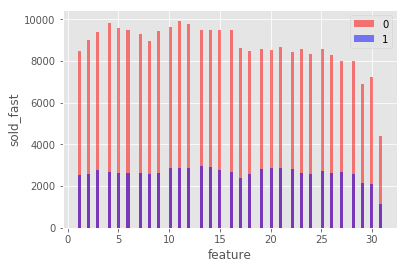

In [20]:
histogram(create_day(data['date_created'].values), data['sold_fast'].values)

**The day of the week**

In [21]:
from datetime import date

def create_weekday(month, day):
    n = len(month)
    
    weekday = np.empty(n, dtype=np.byte)

    for i in range(n):
        weekday[i] = date(2018, month[i], day[i]).weekday()
        
    return weekday

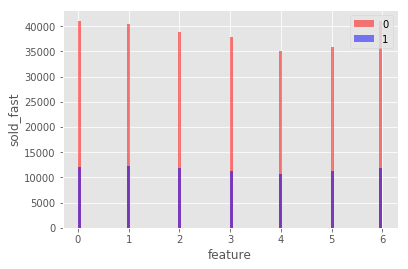

In [22]:
month = create_month(data['date_created'].values)
day = create_day(data['date_created'].values)
histogram(create_weekday(month, day), data['sold_fast'].values)

**The season**

In [23]:
winter_set = {12, 1, 2}
spring_set = {3, 4, 5}
summer_set = {6, 7, 8}
autumn_set = {9, 10, 11}

def create_season(month):
    n = len(month)
    
    season = np.empty(n, dtype=np.byte)
    
    for i in range(n):
        if month[i] in winter_set:
            season[i] = 1
        elif month[i] in spring_set:
            season[i] = 2
        elif month[i] in summer_set:
            season[i] = 3
        elif month[i] in autumn_set:
            season[i] = 4
    
    return season

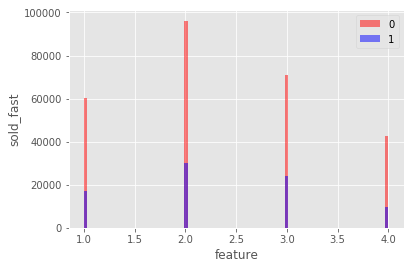

In [24]:
month = create_month(data['date_created'].values)
histogram(create_season(month), data['sold_fast'].values)

**Whether the day is a holiday**

In [25]:
holiday_dict = {
    1: {1, 2, 3, 4, 5, 6, 7, 8, 13, 14, 20, 21, 27, 28},
    2: {3, 4, 10, 11, 17, 18, 23, 24, 25},
    3: {3, 4, 8, 9, 10, 11, 17, 18, 24, 25, 31},
    4: {1, 7, 8, 14, 15, 21, 22, 29, 30},
    5: {1, 2, 5, 6, 9, 12, 13, 19, 20, 26, 27},
    6: {2, 3, 10, 11, 12, 16, 17, 23, 24, 30},
    7: {1, 7, 8, 14, 15, 21, 22, 28, 29},
    8: {4, 5, 11, 12, 18, 19, 25, 26},
    9: {1, 2, 8, 9, 15, 16, 22, 23, 29, 30},
    10: {6, 7, 13, 14, 20, 21, 27, 28},
    11: {3, 4, 10, 11, 17, 18, 24, 25},
    12: {1, 2, 8, 9, 15, 16, 22, 23, 30, 31}
}

def create_holiday(month, day):
    n = len(month)
    
    holiday = np.empty(n, dtype=bool)
    
    for i in range(n):
        holiday[i] = day[i] in holiday_dict[month[i]]
    
    return holiday

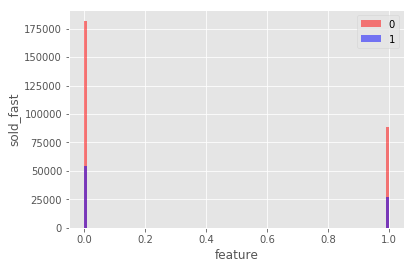

In [26]:
month = create_month(data['date_created'].values)
day = create_day(data['date_created'].values)
histogram(create_holiday(month, day).astype(int), data['sold_fast'].values)

**The normalized distance from the computed center of the city**

In [27]:
center_dict = None
maximum_dict = None

def create_distance(city, lat, long, train=False):
    global center_dict, maximum_dict
    
    n = len(city)
    
    distance = np.empty(n, dtype=float)
    
    location = np.stack((lat, long), axis=1)
    
    if train:
        center_dict = {}
        maximum_dict = {}
        
        names = np.unique(city)
        
        for name in names:
            location_city = location[city == name]
            center_dict[name] = location_city.sum(axis=0) / len(location_city)
        
    for i in range(n):
        if city[i] in center_dict:
            distance[i] = np.linalg.norm(location[i] - center_dict[city[i]])
        else:
            distance[i] = 0.5
    
    if train:
        for name in names:
            maximum_dict[name] = distance[city == name].max()
        
    for i in range(n):
        if city[i] in maximum_dict:
            maximum = maximum_dict[city[i]]
            if maximum != 0:
                distance[i] /= maximum
        
    return distance

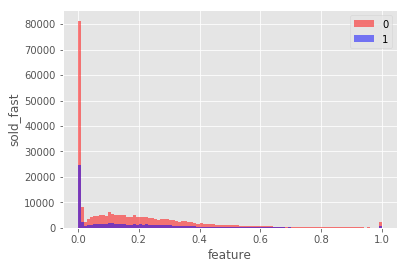

In [28]:
histogram(
    create_distance(
        data['city'].values,
        data['lat'].values,
        data['long'].values,
        True
    ),
    data['sold_fast'].values
)

**The number of words in the description**

In [29]:
def create_words(desc_text):
    n = len(desc_text)
    
    words = np.empty(n, dtype=int)
    
    for i in range(n):
        words[i] = len(desc_text[i].split())
        
    return words

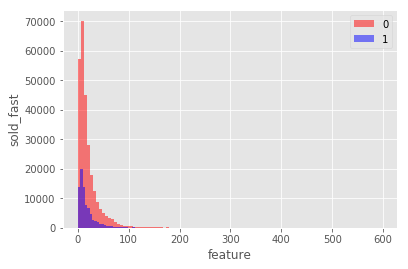

In [30]:
histogram(create_words(data['desc_text'].values), data['sold_fast'].values)

**The number of characters in the description**

In [31]:
def create_chars(desc_text):
    n = len(desc_text)
    
    chars = np.empty(n, dtype=int)
    
    for i in range(n):
        chars[i] = len(desc_text[i])
        
    return chars

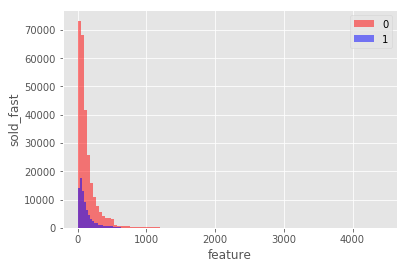

In [32]:
histogram(create_chars(data['desc_text'].values), data['sold_fast'].values)

**Weather the owner has ten or more products sold less than in three days**

In [33]:
popular_set = None

def create_popular(owner_id, sold_fast=None, train=False):
    global popular_set
    
    n = len(owner_id)
    
    popular = np.empty(n, dtype=bool)
    
    if train:
        owners, counts = np.unique(owner_id[sold_fast == 1], return_counts=True)
        
        popular_set = set(owners[counts >= 10])
    
    for i in range(n):
        popular[i] = owner_id[i] in popular_set
    
    return popular                

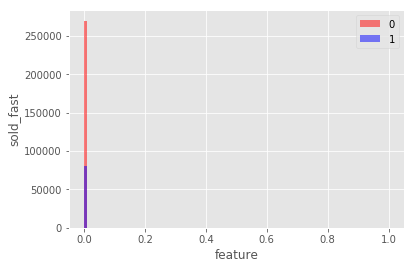

In [34]:
histogram(
    create_popular(
        data['owner_id'].values,
        data['sold_fast'].values,
        True
    ).astype(int),
    data['sold_fast'].values
)

# Machine-learning pipeline and prediction

Here you develop your pipeline, generate features for train and test sets
* Your pipeline should be reproducible - make sure you set all `random_states` if needed

**Model:**

XGBoost

**Included features:**

Categorical features with the target encoding:
- category_id
- subcategory_id
- product_type
- region
- city
- day
- weekday
- season

Text features vectorized with TF-IDF (40 features, stop words removed):
- name_text
- desc_text

Unmodified features:
- delivery_available
- payment_available
- sold_mode
- img_num
- price
- holiday
- distance
- words
- chars
- popular

In [35]:
import nltk

nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('russian')

[nltk_data] Downloading package stopwords to C:\Users\Nikita
[nltk_data]     Zaytsev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
from category_encoders.target_encoder import TargetEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

target_encoder = None
name_vectorizer = None
desc_vectorizer = None

def transform(data, train=False):
    global target_encoder, name_vectorizer, desc_vectorizer
    
    month = create_month(data['date_created'].values)
    day = create_day(data['date_created'].values)
    weekday = create_weekday(month, day)
    season = create_season(month)
    holiday = create_holiday(month, day)
    distance = create_distance(data['city'].values, data['lat'].values, data['long'].values, train)
    words = create_words(data['desc_text'].values)
    chars = create_chars(data['desc_text'].values)
    
    if train:
        popular = create_popular(data['owner_id'].values, data['sold_fast'].values, True)
    else:
        popular = create_popular(data['owner_id'].values)
    
    categorical = np.concatenate((
        data[[
            'category_id',
            'subcategory_id',
            'product_type',
            'region',
            'city'
        ]].values,
        np.stack((
            day,
            weekday,
            season
        ), axis=1)
    ), axis=1)
    
    if train:
        target_encoder = TargetEncoder(cols=range(categorical.shape[1]), return_df=False)
        target_encoder.fit(categorical, data['sold_fast'].values)
        
        name_vectorizer = TfidfVectorizer(max_features=40, stop_words=stop_words)
        name_vectorizer.fit(data['name_text'].values)
        
        desc_vectorizer = TfidfVectorizer(max_features=40, stop_words=stop_words)
        desc_vectorizer.fit(data['desc_text'].values)
        
    return np.concatenate((
        target_encoder.transform(categorical),
        name_vectorizer.transform(data['name_text'].values).toarray(),
        desc_vectorizer.transform(data['desc_text'].values).toarray(),
        data[[
            'delivery_available',
            'payment_available',
            'sold_mode',
            'img_num',
            'price'
        ]].values,
        np.stack((
            holiday,
            distance,
            words,
            chars,
            popular
        ), axis=1)
    ), axis=1)
    

In [37]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.2)

In [38]:
%%time

X_train = transform(data_train, True)
y_train = data_train['sold_fast'].values

X_test = transform(data_test)
y_test = data_test['sold_fast'].values

Wall time: 3min 12s


In [40]:
%%time

from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=4,
    n_jobs=3
)

model.fit(X_train, y_train)

Wall time: 11min 48s


In [41]:
%%time

from sklearn.metrics import accuracy_score

y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)
print('Train accuracy: ', accuracy_score(y_train, y_predicted_train))
print('Test accuracy: ', accuracy_score(y_test, y_predicted_test))

Train accuracy:  0.7713540480528354
Test accuracy:  0.77152454559688
Wall time: 7.25 s


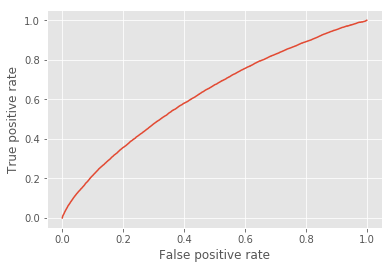

ROC AUC:  0.6247623249244821
Wall time: 2.84 s


In [42]:
%%time

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_predicted_proba = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba[:, 1])

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

print('ROC AUC: ', roc_auc_score(y_test, y_predicted_proba[:, 1]))

# Submission

In [44]:
%%time

X = transform(data_submit)

Wall time: 19.7 s


In [45]:
%%time

predict_proba = model.predict_proba(X)

Wall time: 2.27 s


In [46]:
submission = pd.DataFrame.from_dict({'product_id' : data_submit['product_id'].values, 'score' : predict_proba[:, 1]})
submission.to_csv('submission.csv', sep = ',', index = False)

# Model interpretation
Try to interpret your model results
* What **knowledge** does it reveal?

In [48]:
feature_importances = model.feature_importances_

In [50]:
print('Feature importances:')
print('category_id:', feature_importances[0])
print('subcategory_id:', feature_importances[1])
print('product_type:', feature_importances[2])
print('region:', feature_importances[3])
print('city:', feature_importances[4])
print('day:', feature_importances[5])
print('weekday:', feature_importances[6])
print('season:', feature_importances[7])
print('name_text: max', feature_importances[8:48].max(), 'mean', np.mean(feature_importances[8:48]))
print('desc_text: max', feature_importances[48:88].max(), 'mean', np.mean(feature_importances[48:88]))
print('delivery_available', feature_importances[88])
print('payment_available', feature_importances[89])
print('sold_mode', feature_importances[90])
print('img_num', feature_importances[91])
print('price', feature_importances[92])
print('holiday', feature_importances[93])
print('distance', feature_importances[94])
print('words', feature_importances[95])
print('chars', feature_importances[96])
print('popular', feature_importances[97])

Feature importances:
category_id: 0.023839086
subcategory_id: 0.08939657
product_type: 0.0019865904
region: 0.016637696
city: 0.11882295
day: 0.050533894
weekday: 0.018375963
season: 0.03898684
name_text: max 0.008939657 mean 0.0018624287
desc_text: max 0.017134342 mean 0.0067637204
delivery_available 0.0069530667
payment_available 0.0031040476
sold_mode 0.0059597716
img_num 0.01763099
price 0.12689348
holiday 0.004221505
distance 0.046560716
words 0.021976657
chars 0.056493666
popular 0.006580581


The most important features are:
- category_id
- subcategory_id
- region
- city
- day
- weekday
- season
- desc_text
- img_num
- price
- distance
- words
- chars